# Time Series Modeling with the SARIMAX Model

In [1]:
import pandas as pd
import numpy as np
%pylab inline
pylab.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
milk_df = pd.read_csv('milk.csv')

In [3]:
milk_df.head()

,Month,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [4]:
milk_ts = milk_df.set_index('Month').squeeze()

In [5]:
milk_ts.index = pd.PeriodIndex(milk_ts.index, freq='M')

In [6]:
milk_df.head()

,Month,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


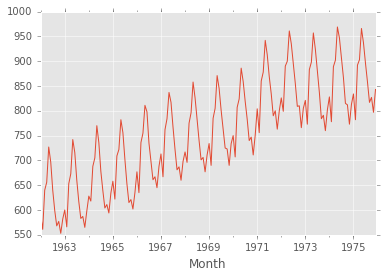

In [7]:
milk_ts.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller
df_stat, p_val, lag, nobs, critical_vals, icbest = adfuller(milk_ts)

print('DF test statistic: {:.4f}, p_val: {:.4f}, lag={}'.format(df_stat, p_val, lag))

DF test statistic: -1.3038, p_val: 0.6274, lag=13


d:\Anaconda3\envs\latest\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [9]:
lag_1day = milk_ts.diff(1)[1:]

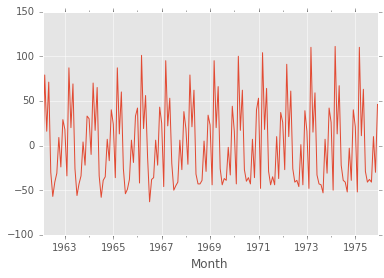

In [10]:
lag_1day.plot()

In [11]:
df_stat, p_val, lag, nobs, critical_vals, icbest = adfuller(lag_1day)
print('DF test statistic: {:.4f}, p_val: {:.4f}, lag={}'.format(df_stat, p_val, lag))

DF test statistic: -3.0550, p_val: 0.0301, lag=14


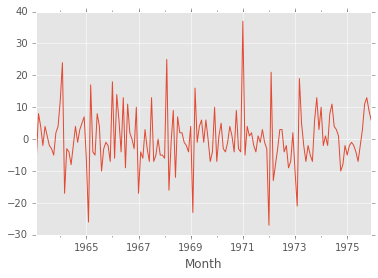

In [12]:
seasonal = lag_1day.diff(12)[12:]
seasonal.plot()

In [13]:
df_stat, p_val, lag, nobs, critical_vals, icbest = adfuller(seasonal)
print('DF test statistic: {:.4f}, p_val: {:.4f}, lag={}'.format(df_stat, p_val, lag))

DF test statistic: -5.0380, p_val: 0.0000, lag=11


In [14]:
from statsmodels.tsa.stattools import acf, pacf

In [15]:
milk_acf = acf(seasonal)[:20]

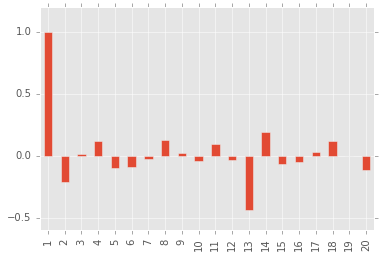

In [16]:
pd.Series(milk_acf, index=range(1, 21)).plot(kind='bar')

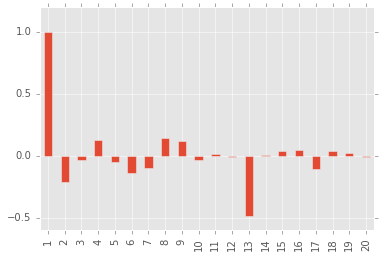

In [17]:
milk_pacf = pacf(seasonal)[:20]
pd.Series(milk_pacf, index=range(1, 21)).plot(kind='bar')

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(milk_ts, trend='n', order=(0, 1 ,0), seasonal_order=(1, 1, 1, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         Production   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Sat, 19 Aug 2017   AIC                           1074.131
Time:                                    10:58:51   BIC                           1083.503
Sample:                                01-31-1962   HQIC                          1077.934
                                     - 12-31-1975                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102     -5.761      0.000      -0.785      -0.387
sigma2        55.5118      5.356     10.365      0.000      45.015      66.009
===================================================================================
Ljung-Box (Q):                       33.48   Jarque-Bera (JB):                32.04
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.77
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
milk_predicted = results.predict()

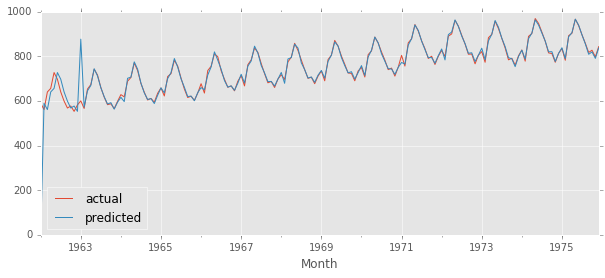

In [20]:
pd.concat({'actual': milk_ts, 'predicted': milk_predicted}, axis=1).plot(figsize=(10, 4))